<p style="text-align: center;>#Grad-Level Term Project Submission Spring 2024</p> <br />

Subject: Statistical Natural Language Processing (INFO-539)   <br />
Name: Eshaan Prasad Mathakari

<h1 style="text-align: center;">Graduate Level Term Project Spring 2024</h1>
<h3 style="text-align: center;">Subject: Statistical Natural Language Processing</h3>
<p style="text-align: center;">Name: Eshaan Prasad Mathakari<p>

## Setting up our Environment

In [9]:
import subprocess
import sys

required_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'wordcloud', 
                     'scikit-learn']  # Update with any additional packages

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for package in required_packages:
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        install_package(package)
        print(f"{package} has been installed.")


pandas is already installed.
numpy is already installed.
matplotlib is already installed.
seaborn is already installed.
wordcloud is already installed.
Installing scikit-learn...
Defaulting to user installation because normal site-packages is not writeable
scikit-learn has been installed.


In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

## Importing our Dataset

In [11]:
def read_csv(file_path):
    text_data = pd.read_csv(file_path, sep=",")
    return text_data

train_path = "./data/train.csv"
test_path = "./data/test.csv"

train_data = read_csv(train_path)
test_data = read_csv(test_path)

## Performing EDA on our Dataset 

In [12]:
# print(train_data)
def basic_eda(df):
    print(df.shape)
    print(df.info())
    print(df.describe())

    if "LABEL" in df.columns:
        print(df["LABEL"].value_counts())


In [13]:
# print(test_data)
basic_eda(train_data)  
basic_eda(test_data) 

(70317, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70317 entries, 0 to 70316
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      70317 non-null  uint64
 1   TEXT    70311 non-null  object
 2   LABEL   70317 non-null  int64 
dtypes: int64(1), object(1), uint64(1)
memory usage: 1.6+ MB
None
                 ID         LABEL
count  7.031700e+04  70317.000000
mean   9.237206e+18      0.813687
std    5.341639e+18      0.831365
min    5.764730e+14      0.000000
25%    4.592511e+18      0.000000
50%    9.273194e+18      1.000000
75%    1.387591e+19      2.000000
max    1.844662e+19      2.000000
LABEL
0    32071
1    19276
2    18970
Name: count, dtype: int64
(17580, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17580 entries, 0 to 17579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      17580 non-null  uint64
 1   TEXT    17579 non-null  object
d

## Visualising our Data

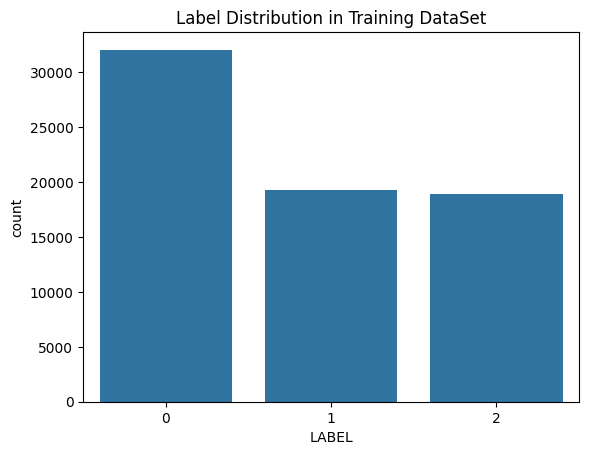

In [14]:
sns.countplot(x="LABEL", data=train_data)
plt.title("Label Distribution in Training DataSet")
plt.show()

In [15]:
train_data_wc = train_data['TEXT'].astype(str)

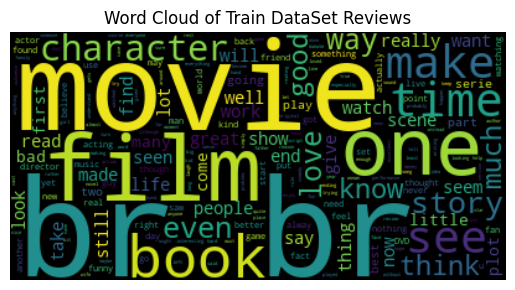

In [16]:
text = " ".join(review for review in train_data_wc)  
wordcloud = WordCloud().generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Train DataSet Reviews")
plt.show()

## Cleaning and Processing Data

In [17]:
train_data = train_data.dropna(subset=['TEXT'])


In [18]:
test_data['TEXT'] = test_data['TEXT'].fillna('no review yet')  

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(train_data['TEXT'])
y_train = train_data['LABEL']
X_test = vectorizer.transform(test_data['TEXT'])

## Spliting into train-test-validation and Implementing Logistic regression


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluating the model on our validation set

In [22]:
y_pred_val = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val, average='macro')
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1-Score: {val_f1:.4f}")

Validation Accuracy: 0.9192
Validation F1-Score: 0.9065


## Make predictions on our test dataset and saving submission file

In [23]:
y_pred = model.predict(X_test)

In [24]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'LABEL': y_pred})

In [25]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'LABEL': y_pred})
submission_df.to_csv('./data/submission/submission.csv', index=False)